In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

Using TensorFlow backend.


In [2]:
# load the model
model = VGG16()
#model = ResNet50()

W0131 12:42:42.176863 16672 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0131 12:42:42.208845 16672 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0131 12:42:42.213842 16672 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0131 12:42:42.258835 16672 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d inste

553467904/553467096 [==============================] - 937s 2us/step


W0131 12:58:23.422754 16672 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0131 12:58:23.424749 16672 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



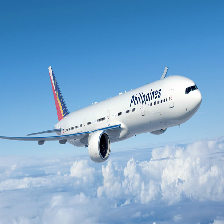

In [33]:
# load an image from file
image = load_img('plane.jpg', target_size=(224, 224))
#image = load_img('plane.jpg', target_size=(100, 100))
image

In [23]:
#image.shape

In [34]:
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)

In [35]:
# predict the probability across all output classes
result = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(result)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

airliner (98.75%)


In [36]:
image.shape

(1, 224, 224, 3)

In [ ]:
#End of Code

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [ ]:
# serialize model to JSON
model_json=classifier.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
# serialize weights to HDFS
classifier